# OpenCV Images

OpenCV est l'outil de réference en ce qui concerne l'analyse et le traitement d'images classiques. Il propose une façon simplifiée d'accéder aux données d'images et quelques algorithmes déjà implémentés pour les traiter.

On peut charger une image de manière très simple.

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


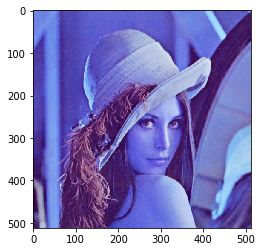

In [1]:
%matplotlib inline  

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/lenna.png')
print(img)
plt.imshow(img)

Une image est représentée sous forme de matrice. Chacun des élements de la matrice pouvant être representé indépendamment et correspondant à un pixel.

Un pixel est, par défaut, représenté en BGR : Blue, Green, Red.

On peut également accéder aux dimensions de l'image avec la commande `img.shape`.

In [2]:
px = img[100][100]
print(px)
print((px == [78, 68, 178]).all())

shape = img.shape
print(shape)
# plt.imshow(img)

[ 78  68 178]
True
(512, 512, 3)


On peut filtrer les pixels, d'une image pour ne garder que ceux entre deux valeurs. Les différents types de seuils sont indiqués ici : https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html.

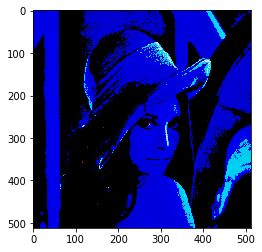

In [3]:
_, mask = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO)
plt.imshow(mask)

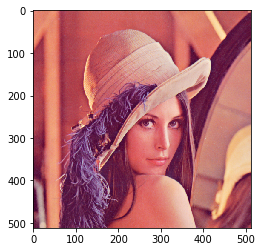

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

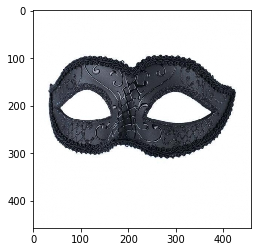

In [5]:
img2 = cv2.imread('data/masque-venitien.jpg')
plt.imshow(img2)

Vous pouvez changer les pixels d'une image en lui attribuant une nouvelle valeur.

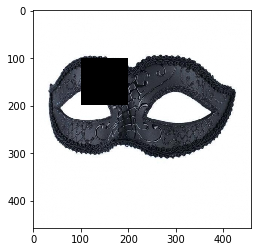

In [6]:
img2_square = img2.copy()
for i in range(100, 200):
    for j in range(100, 200):
        img2_square[i][j] = [0, 0, 0]
        
plt.imshow(img2_square)

## Exercice 1 : Tester les opérations

Placer le masque devant les yeux de Lenna. Il va falloir le retrecir, le placer au bon endroit et le seuiller pour enlever tous les pixels blancs.

Parmis les fonctions implémentées par opencv en figurent qui **peuvent** vous être utiles : 

  - Vous pouvez aditionner deux images de la même taille en utilisant la fonction `cv2.add(img1, img2)`.
  - Vous pouvez créer une nouvelle image noire en utilisant la fonction numpy (chargé ici sous l'alias `np`) `np.zeros((height,width,3), np.uint8)`.
  - Vous pouvez redimensionner une image avec la fonction `cv2.resize(img, (new_height, new_width))`.
  
On peut même retourner le masque pour qu'il convienne mieux à la disposition de Lenna avec la fonction `cv2.flip(img, axis)`.

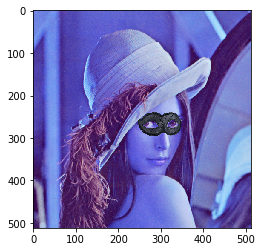

In [7]:
import numpy as np

lenna_with_mask = img.copy()

## ----- TODO : Placer le masque devant les yeux de Lenna ----- ##
## ------------------------------------------------------------ ##

plt.imshow(lenna_with_mask)

## Exercice 2 : Flouter une image

On peut flouter une image (blur) en appliquant la fonction `cv2.blur(img,(5,5))`.

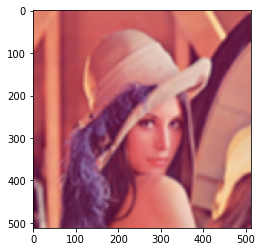

In [8]:
plt.imshow(cv2.blur(img_rgb, (10, 10)))

Ce qu'il se passe ici, c'est l'application d'une moyenne à tous les pixels de l'image. On parcourt chaque pixel de l'image et on lui donne pour valeur la moyenne de tous ses pixels adjacents. Cela permet par exemple d'enlever le bruit.
En faisant cela, il faut faire attention au cas particulier des pixels en bord d'image (au choix : soit on ne les traite pas, soit on les adapte).

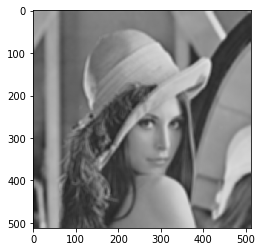

In [9]:
def mean_pixel(lenna_grey, i, j, convolution_matrix_size):
    ## ----- TODO : Retourner le pixel moyenné sur la matrice de taille convolution_matrix_size ----- ##
    ## ---------------------------------------------------------------------------------------------- ##

lenna_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lenna_grey_blurred =  np.zeros((lenna_grey.shape[0], lenna_grey.shape[1], 3), np.uint8)

for i in range(lenna_grey.shape[0]):
    for j in range(lenna_grey.shape[1]):
        lenna_grey_blurred[i][j] = mean_pixel(lenna_grey, i, j, 9)

plt.imshow(lenna_grey_blurred, cmap="gray")

## Exercice 3 : Détection de bordures

Les convolutions sont la base du traitement d'images. Ici, nous allons appliquer le filtre de sobel qui correspond à la matrice :
```python
[
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]
```

S'inspirer de la fonction précedente pour écrire une fonction appliquant l'opérateur de Sobel.

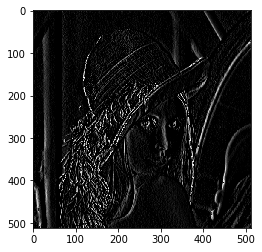

In [13]:
sobel_matrix = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

half_matrix_size = int(sobel_matrix.shape[0]/2)

def sobel_pixel(lenna_grey, i, j, sobel_matrix):
    ## ----- TODO : Retourner le pixel résultat de l'application du filtre de sobel ----- ##
    ## ---------------------------------------------------------------------------------------------- ##

lenna_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lenna_grey_edge =  lenna_grey.copy()

for i in range(lenna_grey.shape[0]):
    for j in range(lenna_grey.shape[1]):
        if 0 < i-half_matrix_size and i+half_matrix_size < lenna_grey.shape[0]:
            if 0 < j-half_matrix_size and j+half_matrix_size < lenna_grey.shape[1]:
                lenna_grey_edge[i][j] = sobel_pixel(lenna_grey, i, j, sobel_matrix)

                
plt.imshow(lenna_grey_edge, cmap="gray")